In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [ ]:
df_cicle = pd.DataFrame()

df = pd.read_csv(r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 4\Enterprise Challenge\sensor_data_30000.csv")
df['timestamp_ms'] = df['timestamp_ms']/1000

df_cicle['timestamp_m'] = (df['timestamp_ms']//60).drop_duplicates()


# for a in range(0, max(df['cycleCount'].drop_duplicates()) + 1):
#     df_cicle.loc[df_cicle['cycle'] == a, 'tempC_median'] = df.loc[df['cycleCount'] == a, 'tempC'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'currentA_median'] = df.loc[df['cycleCount'] == a, 'currentA'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accX_g_median'] = df.loc[df['cycleCount'] == a, 'accX_g'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accY_g_median'] = df.loc[df['cycleCount'] == a, 'accY_g'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accZ_g_median'] = df.loc[df['cycleCount'] == a, 'accZ_g'].median()

# for a in range(0, max(df['cycleCount'].drop_duplicates()) + 1):
#     df_cicle.loc[df_cicle['cycle'] == a, 'tempC_median'] = df.loc[df['cycleCount'] == a, 'tempC'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'currentA_median'] = df.loc[df['cycleCount'] == a, 'currentA'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accX_g_median'] = df.loc[df['cycleCount'] == a, 'accX_g'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accY_g_median'] = df.loc[df['cycleCount'] == a, 'accY_g'].median()
#     df_cicle.loc[df_cicle['cycle'] == a, 'accZ_g_median'] = df.loc[df['cycleCount'] == a, 'accZ_g'].median()
display(df_cicle)
display(df)

,timestamp_ms
0,0.0
60,1.0
120,2.0
180,3.0
240,4.0
...,...
29700,495.0
29760,496.0
29820,497.0
29880,498.0


,timestamp_ms,cycleCount,tempC,currentA,accX_g,accY_g,accZ_g,alertMsg
0,0.0,1,25.00,0.65,0.27,0.28,10.00,NaN
1,1.0,1,25.80,0.57,0.29,0.06,9.82,NaN
2,2.0,1,26.59,0.65,-0.23,-0.26,9.92,NaN
3,3.0,1,27.36,0.69,0.10,-0.18,9.68,NaN
4,4.0,1,28.12,0.68,0.10,0.06,9.76,NaN
...,...,...,...,...,...,...,...,...
29995,29995.0,6000,30.28,0.40,0.03,-0.01,9.81,Alerta: Temperatura alta!
29996,29996.0,6000,29.65,0.51,0.00,-0.06,10.07,NaN
29997,29997.0,6000,28.98,0.72,0.16,-0.15,9.88,NaN
29998,29998.0,6000,28.27,0.64,-0.08,0.20,9.54,NaN


ValueError: 'x' has size 6000, but 'y2' has an unequal size of 30000

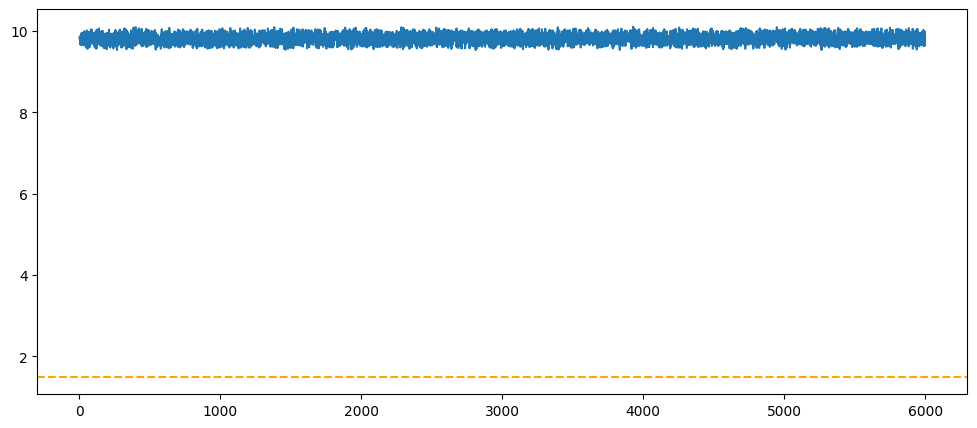

In [ ]:
# Calcular aceleração total combinando X, Y e Z
df_cicle['acc_total'] = np.sqrt(df_cicle['accX_g_median']**2 + df_cicle['accY_g_median']**2 + df_cicle['accZ_g_median']**2)

# Considerar anormal aceleração > 1.5g (ajustável)
limite_anomalia = 1.5

plt.figure(figsize=(12, 5))
plt.plot(df_cicle['cycle'], df_cicle['acc_total'], label='Aceleração Total')
plt.axhline(limite_anomalia, color='orange', linestyle='--', label='Limite Anômalo')
plt.fill_between(df_cicle['cycle'], limite_anomalia, df['acc_total'],
                 where=(df_cicle['acc_total'] > limite_anomalia), color='orange', alpha=0.3)
plt.legend()
plt.title("Detecção de Impactos (Aceleração Anormal)")
plt.xlabel("Tempo")
plt.ylabel("Aceleração (g)")
plt.show()